<a href="https://colab.research.google.com/github/niranjan-sa/DataScience/blob/master/Innoplexus_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir('../.')
train = pd.read_csv('../train_F3WbcTw.csv')
test = pd.read_csv('../test_tOlRoBf.csv')

In [14]:
print (train.shape)
print (test.shape)

(5279, 4)
(2924, 3)


In [15]:
train.head(3)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2


In [17]:
train.drug.unique().shape

(102,)

In [18]:
test.drug.unique().shape

(95,)

In [24]:
combi = train.append(test, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [35]:
combi.head()

,drug,sentiment,text,unique_hash,tidy_text
0,gilenya,2.0,autoimmune diseases tend to come in clusters. ...,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,autoimmune diseases tend to come in clusters ...
1,gilenya,2.0,i can completely understand why you’d want to ...,9eba8f80e7e20f3a2f48685530748fbfa95943e4,i can completely understand why you d want to ...
2,fingolimod,2.0,interesting that it only targets s1p-1/5 recep...,fe809672251f6bd0d986e00380f48d047c7e7b76,interesting that it only targets s p recep...
3,ocrevus,2.0,"very interesting, grand merci. now i wonder wh...",bd22104dfa9ec80db4099523e03fae7a52735eb6,very interesting grand merci now i wonder wh...
4,gilenya,1.0,"hi everybody, my latest mri results for brain ...",b227688381f9b25e5b65109dd00f7f895e838249,hi everybody my latest mri results for brain ...


In [36]:
combi.tail()

,drug,sentiment,text,unique_hash,tidy_text
8198,remicade,NaN,reply posted for hippopostrous. we are sorry t...,ac6e60bec9162ae66effd29a0dc9ad11ff966df6,reply posted for hippopostrous we are sorry t...
8199,gilenya,NaN,aw lorraine that's crap. what a shame you've h...,12afabb6210825308ead9894916abdfc912d7c43,aw lorraine that s crap what a shame you ve h...
8200,opdivo,NaN,jskozio14\n that sounds like nonsense to me. ...,021bb88c92a71229288304d691d53c3ff7004e4b,jskozio that sounds like nonsense to me e...
8201,stelara,NaN,it sounds like you're doing very well fg! i wo...,9936efcb83eded79fe9454df188edd7b96c6109e,it sounds like you re doing very well fg i wo...
8202,cladribine,NaN,"hi @rambles too! it’s such a hard decision, is...",05402df12d6769d7f38ab40e0b81464e65e1df0a,hi rambles too it s such a hard decision is...


**Text Conversions**

1.   Converting the reviews into lowercase
2.   Remove special characters, numbers, punctuations
3.   Remove small words with length <= 3



In [0]:
combi['text'] = combi['text'].str.lower()

In [0]:
combi['tidy_text'] = combi['text'].str.replace("[^a-zA-Z#]", " ")

In [0]:
combi['tidy_text'] = combi['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

**Tokenization of cleaned text**

In [38]:
tokenized_text = combi['tidy_text'].apply(lambda x: x.split())
print (tokenized_text.head())

0    [autoimmune, diseases, tend, come, clusters, g...
1    [completely, understand, want, results, report...
2    [interesting, that, only, targets, receptors, ...
3    [very, interesting, grand, merci, wonder, wher...
4    [everybody, latest, results, brain, cervical, ...
Name: tidy_text, dtype: object


In [39]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_text.head()

0    [autoimmun, diseas, tend, come, cluster, gilen...
1    [complet, understand, want, result, report, le...
2    [interest, that, onli, target, receptor, rathe...
3    [veri, interest, grand, merci, wonder, where, ...
4    [everybodi, latest, result, brain, cervic, cor...
Name: tidy_text, dtype: object

Gluing the processed tokens together into our main data frame.

In [0]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])

combi['tidy_text'] = tokenized_text

# Visualizations and Analysis

In [0]:
train = combi.iloc[:5279,:]
test = combi.iloc[5279:, :]

In [46]:
del combi
import gc
gc.collect()

332

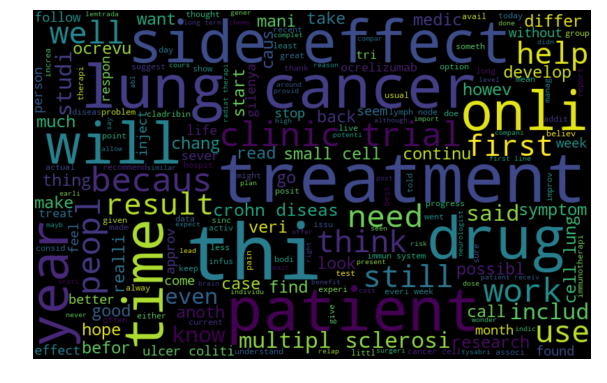

In [48]:
all_words = ' '.join([txt for txt in train['tidy_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Word clouds for different Sentiments

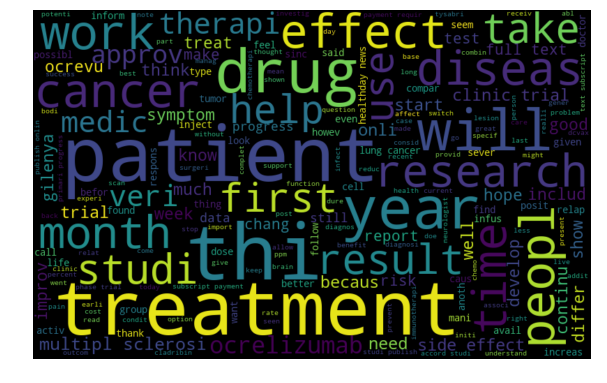

In [49]:
all_words = ' '.join([txt for txt in train['tidy_text'][train['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

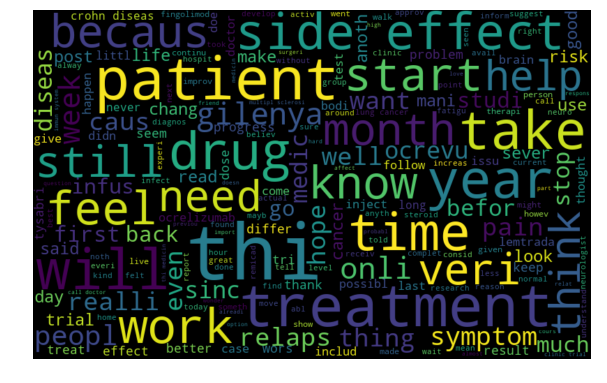

In [50]:
all_words = ' '.join([txt for txt in train['tidy_text'][train['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

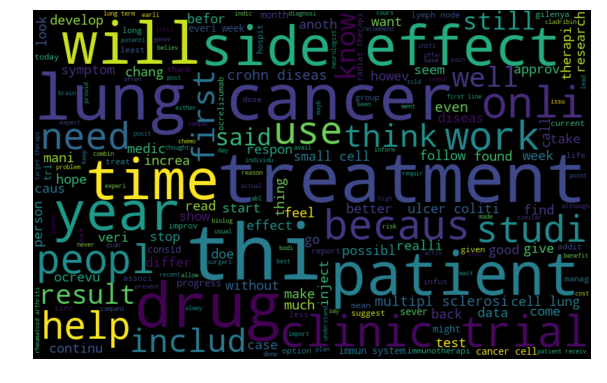

In [51]:
all_words = ' '.join([txt for txt in train['tidy_text'][train['sentiment']==2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()